In [1]:
import pandas as pd
import numpy as np

In [ ]:
#Part 1, sub task 1 - select one movie from n different movies

In [2]:
df = pd.read_csv('movie_dataset.csv')

In [3]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [4]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
df.shape

(4803, 24)

In [6]:
df['original_title'].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: original_title, dtype: object

In [7]:
df = df.drop(columns=['homepage','id','original_title','production_countries','production_companies'])

In [8]:
df.columns

Index(['index', 'budget', 'genres', 'keywords', 'original_language',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [9]:
df.shape

(4803, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 19 columns):
index                4803 non-null int64
budget               4803 non-null int64
genres               4775 non-null object
keywords             4391 non-null object
original_language    4803 non-null object
overview             4800 non-null object
popularity           4803 non-null float64
release_date         4802 non-null object
revenue              4803 non-null int64
runtime              4801 non-null float64
spoken_languages     4803 non-null object
status               4803 non-null object
tagline              3959 non-null object
title                4803 non-null object
vote_average         4803 non-null float64
vote_count           4803 non-null int64
cast                 4760 non-null object
crew                 4803 non-null object
director             4773 non-null object
dtypes: float64(3), int64(4), object(12)
memory usage: 713.0+ KB


In [11]:
# W = rv + cm
#     --------
#     v + m
    
# w = weighted rating
# r = average rating of movie
# v = number of rating for the movie
# m = minimum votes required to be listed 
# c = mean across whole report

In [12]:
v = df['vote_count']
r = df['vote_average']
c = df['vote_average'].mean()
m = df['vote_count'].quantile(0.5)

In [13]:
df['weighted average'] = ((r*v)+(c*m))/(v+m)

In [14]:
df.head()

,index,budget,genres,keywords,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,weighted average
0,0,237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,7.178368
1,1,300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,6.859907
2,2,245000000,Action Adventure Crime,spy based on novel secret agent sequel mi6,en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,6.289611
3,3,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,en,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,7.562066
4,4,260000000,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,6.099220


In [15]:
df_sorted = df.sort_values('weighted average',ascending=False)

In [16]:
df_sorted[['title','vote_count','vote_average','popularity','weighted average']].head(20)

,title,vote_count,vote_average,popularity,weighted average
1881,The Shawshank Redemption,8205,8.5,136.747729,8.432957
3337,The Godfather,5893,8.4,143.659698,8.311498
662,Fight Club,9413,8.3,146.757391,8.246223
3232,Pulp Fiction,8428,8.3,121.463076,8.240109
1818,Schindler's List,4329,8.3,104.469351,8.186319
3865,Whiplash,4254,8.3,192.528841,8.184420
2294,Spirited Away,3840,8.3,118.968562,8.172677
65,The Dark Knight,12002,8.2,187.322927,8.159521
2731,The Godfather: Part II,3338,8.3,105.792936,8.154789
809,Forrest Gump,7927,8.2,138.133331,8.139311


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

weight_average=df_sorted.sort_values('weighted average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted average'].head(20), y=weight_average['title'].head(20), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

In [18]:
#we have considered vote count and vote average but popularity of a movie is also important


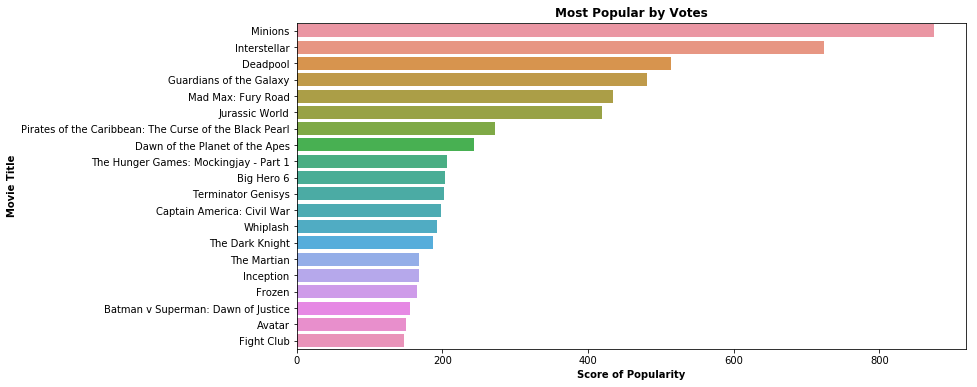

In [19]:
popularity=df_sorted.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(20), y=popularity['title'].head(20), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [20]:
#we will also consider popularity
#50% for popularity and 50% to weighted average

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
df_scaled=scaling.fit_transform(df[['weighted average','popularity']])
df_normalized=pd.DataFrame(df_scaled,columns=['weighted average','popularity'])
df_normalized.head()

,weighted average,popularity
0,0.718493,0.171815
1,0.647036,0.158846
2,0.519072,0.122635
3,0.804588,0.128272
4,0.476352,0.050169


In [22]:
df_sorted[['normalized weight average','normalized popularity']] = df_normalized

In [23]:
df_sorted['score'] = df_sorted['normalized weight average'] * 0.5 + df_sorted['normalized popularity'] * 0.5
df_sorted = df_sorted.sort_values(['score'], ascending=False)
df_sorted[['title', 'normalized weight average', 'normalized popularity', 'score']].head(20)

,title,normalized weight average,normalized popularity,score
95,Interstellar,0.915754,0.827162,0.871458
546,Minions,0.540464,1.000000,0.770232
94,Guardians of the Galaxy,0.870859,0.549462,0.710161
788,Deadpool,0.762082,0.587690,0.674886
127,Mad Max: Fury Road,0.717301,0.495989,0.606645
3865,Whiplash,0.944233,0.219887,0.582060
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.938646,0.213941,0.576294
3337,The Godfather,0.972747,0.164074,0.568410
662,Fight Club,0.958100,0.167611,0.562856


In [24]:
df_sorted[['title', 'normalized weight average', 'normalized popularity', 'score']].head(10)

,title,normalized weight average,normalized popularity,score
95,Interstellar,0.915754,0.827162,0.871458
546,Minions,0.540464,1.000000,0.770232
94,Guardians of the Galaxy,0.870859,0.549462,0.710161
788,Deadpool,0.762082,0.587690,0.674886
127,Mad Max: Fury Road,0.717301,0.495989,0.606645
3865,Whiplash,0.944233,0.219887,0.582060
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.938646,0.213941,0.576294
3337,The Godfather,0.972747,0.164074,0.568410
662,Fight Club,0.958100,0.167611,0.562856


In [25]:
#since there is no paramenter to choose an initial movie I have chosen to recommend on the basis of vote_count
#vote_average and popularity the best movie is Interstellar, but not everyone maybe interested in watching sci-fi
#after a drunken night, so what we can do is give an option to choose from the top 10 or can randomly generate one 
#number between 1-10 and choose the movie at that rank.


In [60]:
#randomly generating number
import random
rank = random.randint(1,10)

In [61]:
rank

6

In [57]:
#here we will go with the top movie which is interstellar

In [28]:
#sub task part 2 - i use a content based recommendation system

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
df1 = pd.read_csv('movie_dataset.csv')

In [31]:
df1.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [32]:
df1[['revenue','title','popularity']].head()

,revenue,title,popularity
0,2787965087,Avatar,150.437577
1,961000000,Pirates of the Caribbean: At World's End,139.082615
2,880674609,Spectre,107.376788
3,1084939099,The Dark Knight Rises,112.312950
4,284139100,John Carter,43.926995


In [33]:
df1.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [34]:
features = ['cast','genres','director','overview','keywords']

In [35]:
for feature in features:
    df[feature] = df[feature].fillna('')

In [36]:
def combine_features(row):
    return row['keywords'] +' '+row['cast']+' '+row['genres']+' '+row['director']+' '+row['overview']

df1['combine_features'] = df.apply(combine_features,axis=1)

print(df1['combine_features'].head())

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 Dan...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
Name: combine_features, dtype: object


In [37]:
tfv = TfidfVectorizer(min_df=3, max_df = 700,ngram_range=(1,2),stop_words='english')

In [38]:
tfv_matrix = tfv.fit_transform(df1['combine_features'])
cosine_sim = cosine_similarity(tfv_matrix)

In [40]:
def get_index_from_title(title):
    return df[df.title == title]['index'].values[0]

def get_title_from_index(index):
    return df[df.index == index]['title'].values[0]

In [41]:
def give_rec(movie_recommended):
    movie_index = get_index_from_title(movie_recommended)
    similar_movies = list(enumerate(cosine_sim[movie_index]))
    sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)
    
    i = 0
    for movie in sorted_similar_movies:
        print(get_title_from_index(movie[0]))
        i = i+1
        if i>5:
            break

In [62]:
give_rec('Interstellar')
#these are in order of most similariy according to the model

Interstellar
The Matrix
Midnight Special
The Matrix Revolutions
Contact
Stealth


In [63]:
#recommendations for some other movies



In [64]:
give_rec('Mad Max: Fury Road')

Mad Max: Fury Road
Mad Max
Mad Max 2: The Road Warrior
The Book of Eli
9
The Maze Runner


In [65]:
give_rec('Fight Club')

Fight Club
Howards End
The Heart of Me
Poultrygeist: Night of the Chicken Dead
The Curious Case of Benjamin Button
Crazy in Alabama


In [54]:
#Trailer Analysis part

In [55]:
#will perfrom trailer analysis using like/dislikes ration and analysing if the comments on the trailer are positive
#or negative

In [66]:
#the process of getting data can be automated


In [69]:
#first analysing the likes to dislikes ratio
# all stats will be taken from movieclips channel on youtube
matrix = 9473/356
midnight_special = 9517/529
matrix_rev = 3472/137
contact = 343/13
stealth = 942/72

In [70]:
print(matrix)
print(midnight_special)
print(matrix_rev)
print(contact)
print(stealth)

26.40449438202247
17.958412098298677
24.817518248175183
26.384615384615383
13.083333333333334


In [71]:
#now we will train a movie review classifier and apply it on comments 

In [72]:
review = pd.read_csv('moviereviews2.tsv',sep='\t')


In [73]:
review.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


In [75]:
review.isnull().sum()

label      0
review    20
dtype: int64

In [76]:
review.dropna(inplace=True)

In [77]:
review['label'].value_counts()

pos    2990
neg    2990
Name: label, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

X = review['review']
y = review['label']

 

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20, random_state=42)

In [82]:

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC



text_clf = Pipeline([('tfidf',TfidfVectorizer()),('svm',LinearSVC())]
                   
                   )

text_clf.fit(X_train,y_train)





Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [83]:
predictions = text_clf.predict(X_test)

In [84]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[536  60]
 [ 36 564]]


In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.94      0.90      0.92       596
         pos       0.90      0.94      0.92       600

   micro avg       0.92      0.92      0.92      1196
   macro avg       0.92      0.92      0.92      1196
weighted avg       0.92      0.92      0.92      1196



In [86]:
print(accuracy_score(y_test,predictions))

0.919732441471572


In [87]:
#Now we can predict if the reiews are positive or negative

In [105]:
#first the matrix 
print(text_clf.predict(['this film was ahead of its time']))
print(text_clf.predict(['First movie me and my dad saw together that we actually had a conversation about afterwards...my dad is the silent business type...and he was like a little kid after watching this movie...he wouldnt even let me go to bed after we got home from the movies and my mom had to come get him from my room...']))
print(text_clf.predict(['You can’t be told what the matrix is, you have to see it for your self Excellent marketing!!']))
print(text_clf.predict(['Terminator 2 and The Matrix Best 90s movies ever.']))
print(text_clf.predict(['1999 Keanu Reeves: Guns, lots of guns.2019 Keanu Reeves, 20 years later: Guns, lots of guns.']))

matrix1 = 4/5 * 10
print(matrix1)

['pos']
['pos']
['pos']
['pos']
['neg']
8.0


In [106]:
#second midnight special
print(text_clf.predict(['Lets just hope that SHIELD gets to him first, not HYDRA.']))
print(text_clf.predict(['Do yourself a favor and go see this in the theatre. I went into it without knowing anything at all about it, and was absolutely floored. Its an awesome film.']))
print(text_clf.predict(['M83s Midnight City']))
print(text_clf.predict(['0:43 dont be afraid I feel it too']))
print(text_clf.predict(['Weird name for this type of film but having just watched it i can confirm this film is awesome']))

midnight_special1 = 5/5 * 10
print(midnight_special1)

['pos']
['pos']
['pos']
['pos']
['pos']
10.0


In [107]:
#third matrix revolutions
print(text_clf.predict(['Who comes here after the announcement of Matrix 4?']))
print(text_clf.predict(['Hugo weaving starred in the Matrix Trilogy & the Lord of the Rings trilogy all around the same time. Then followed up in 2004 with V for Vendetta. What a guy!']))
print(text_clf.predict(['I waited 4 hours to download this trailer on dial up on the original Matrix website']))
print(text_clf.predict(['If we have to give our lives, we give em hell before we do!..... my god, thats good writing. lol']))
print(text_clf.predict(['I wish they made more films about the Matrix. The fighting, story and the conspiracy theories that emerged from these movies created a new world for millions of people out there. Some of the conspiracy theories even created a new "religion", the CGI was at the time freaking impressive, the fighting in slow-mo were even more epic and the story itself captured alot of hearts.Just sayin to you all who think this movie (and/or the first two) sucked balls,- you are a minority.']))

matrix_rev1 = 2/5 * 10
print(matrix_rev1)

['neg']
['neg']
['neg']
['pos']
['pos']
4.0


In [108]:
#fourth contact
print(text_clf.predict(['I will not Jodie Foster this kind of behavior']))
print(text_clf.predict(['Whos here for Katya from rpdr uhhhhhhhhhhhhhhh']))
print(text_clf.predict(['Just watched this earlier. Still  one of the best film Ive seen.']))
print(text_clf.predict(['"Why dont they speak English?"Clearly James Woods on screen and off screen is just as much of an idiot lol']))
print(text_clf.predict(['I watched this the other day. It’s still so good.']))

contact1 = 4/5 * 10
print(contact1)

['pos']
['pos']
['pos']
['neg']
['pos']
8.0


In [109]:
# fifth stealth
print(text_clf.predict(['Ive heard that according to IMDB, this was actually meant to be a live-action Star Fox movie, but Rob Cohen, W.D. Richter, and Original Film couldnt get the license from Nintendo (who are still sore over the car crash that is the Super Mario Bros. movie).That may be apocryphal, but I really wouldnt be surprised, and Id have liked to have seen that hypothetical movie.']))
print(text_clf.predict(['Just heard this is happening for real June 2021']))
print(text_clf.predict(['I remember watching this on my PSP']))
print(text_clf.predict(['Pronounced Stale-th.']))
print(text_clf.predict(['A great thrill ride movie in my prospective. I just dont know why critics dislike it.']))

stealth1 = 4/5 * 10
print(stealth1)

['pos']
['pos']
['pos']
['neg']
['pos']
8.0


In [104]:
print(matrix)
print(midnight_special)
print(matrix_rev)
print(contact)
print(stealth)

26.40449438202247
17.958412098298677
24.817518248175183
26.384615384615383
13.083333333333334


In [115]:
matrix2 = matrix+matrix1
midnight_special2 = midnight_special1+midnight_special
matrix_rev2 = matrix_rev+matrix_rev1
contact2 = contact+contact1
stealth2 = stealth+stealth1

In [116]:
print(matrix2)
print(midnight_special2)
print(matrix_rev2)
print(contact2)
print(stealth2)

34.40449438202247
27.958412098298677
28.817518248175183
34.38461538461539
21.083333333333336


In [117]:
matrix2 = 0.5*matrix+0.5*matrix1
midnight_special2 = 0.5*midnight_special1+0.5*midnight_special
matrix_rev2 = 0.5*matrix_rev+0.5*matrix_rev1
contact2 = 0.5*contact+0.5*contact1
stealth2 = 0.5*stealth+0.5*stealth1

In [118]:
print(matrix2)
print(midnight_special2)
print(matrix_rev2)
print(contact2)
print(stealth2)

17.202247191011235
13.979206049149338
14.408759124087592
17.192307692307693
10.541666666666668


In [119]:
#we give 50% weightage to comments and 50% to likes/dislike
#based on that, The model recommends that The Matrix be watched